In [5]:
# Import relevant libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#check file directory

import os
os.getcwd()
os.chdir("C:/Users/mohit parmar/Downloads/titanic_survived prediction using RF")


In [7]:
# read dataset and make dataframe
df =pd.read_csv("titanic.csv")

In [8]:
df.shape

(891, 12)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#data cleaning

df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
# drop features contains most of value null,cause it's not imortant for model

df1 = df.drop(["Cabin"],axis=1)

In [13]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
#fill null values with mean

df1["Age"] = df1["Age"].fillna(df["Age"].mean())

In [15]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
df1["Embarked"] = df1["Embarked"].fillna(df1["Embarked"].mode()[0])

In [17]:
#change feature dtype..
df1["Pclass"] = df1["Pclass"].apply(str)

In [18]:
#aplly get_dummies for object features to encoding... 

for i in df1.dtypes[df1.dtypes == "object"].index:
    dummy = df1.pop(i)
    df1=pd.concat([df1,pd.get_dummies(dummy,prefix= i)],axis=1)
    
df1.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
labels =df1.pop("Survived")

In [20]:
labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
#define input and target features
x=df1
y=labels

In [22]:
#split the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =10)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
#make model
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
# make prediction on test data
y_pred = rf.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.8340807174887892

In [29]:
from sklearn.metrics import roc_curve,auc

In [30]:
FPR,TPR,thresolds = roc_curve(y_test,y_pred) 

In [31]:
roc_auc = auc(FPR,TPR)
roc_auc

0.7851772287862513

In [32]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_result = []
test_result = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator,n_jobs=-1)
    rf.fit(x_train,y_train)
    train_pred =rf.predict(x_train)
    FPR,TPR,thresold = roc_curve(y_train,train_pred)
    roc_auc = auc(FPR,TPR)
    train_result.append(roc_auc)
    y_pred =rf.predict(x_test)
    FPR,TPR,thresold = roc_curve(y_test,y_pred)
    roc_auc =auc(FPR,TPR)
    test_result.append(roc_auc)

In [33]:
print(roc_auc)

0.7985588972431078


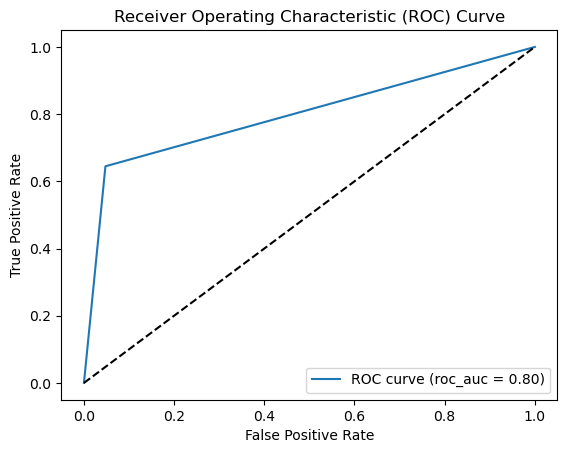

In [34]:
plt.plot(FPR,TPR, label='ROC curve (roc_auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

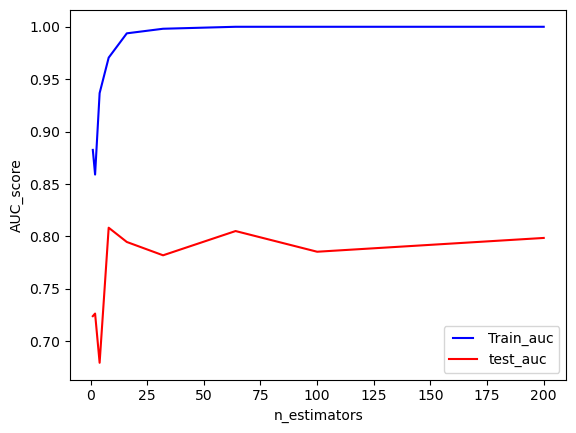

In [35]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_result,"b",label="Train_auc")
line2, = plt.plot(n_estimators,test_result,"r",label="test_auc")
plt.legend(handler_map = {line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC_score")
plt.xlabel("n_estimators")
plt.show()


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test,y_pred)

In [38]:
cm

array([[140,   7],
       [ 27,  49]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       147
           1       0.88      0.64      0.74        76

    accuracy                           0.85       223
   macro avg       0.86      0.80      0.82       223
weighted avg       0.85      0.85      0.84       223

